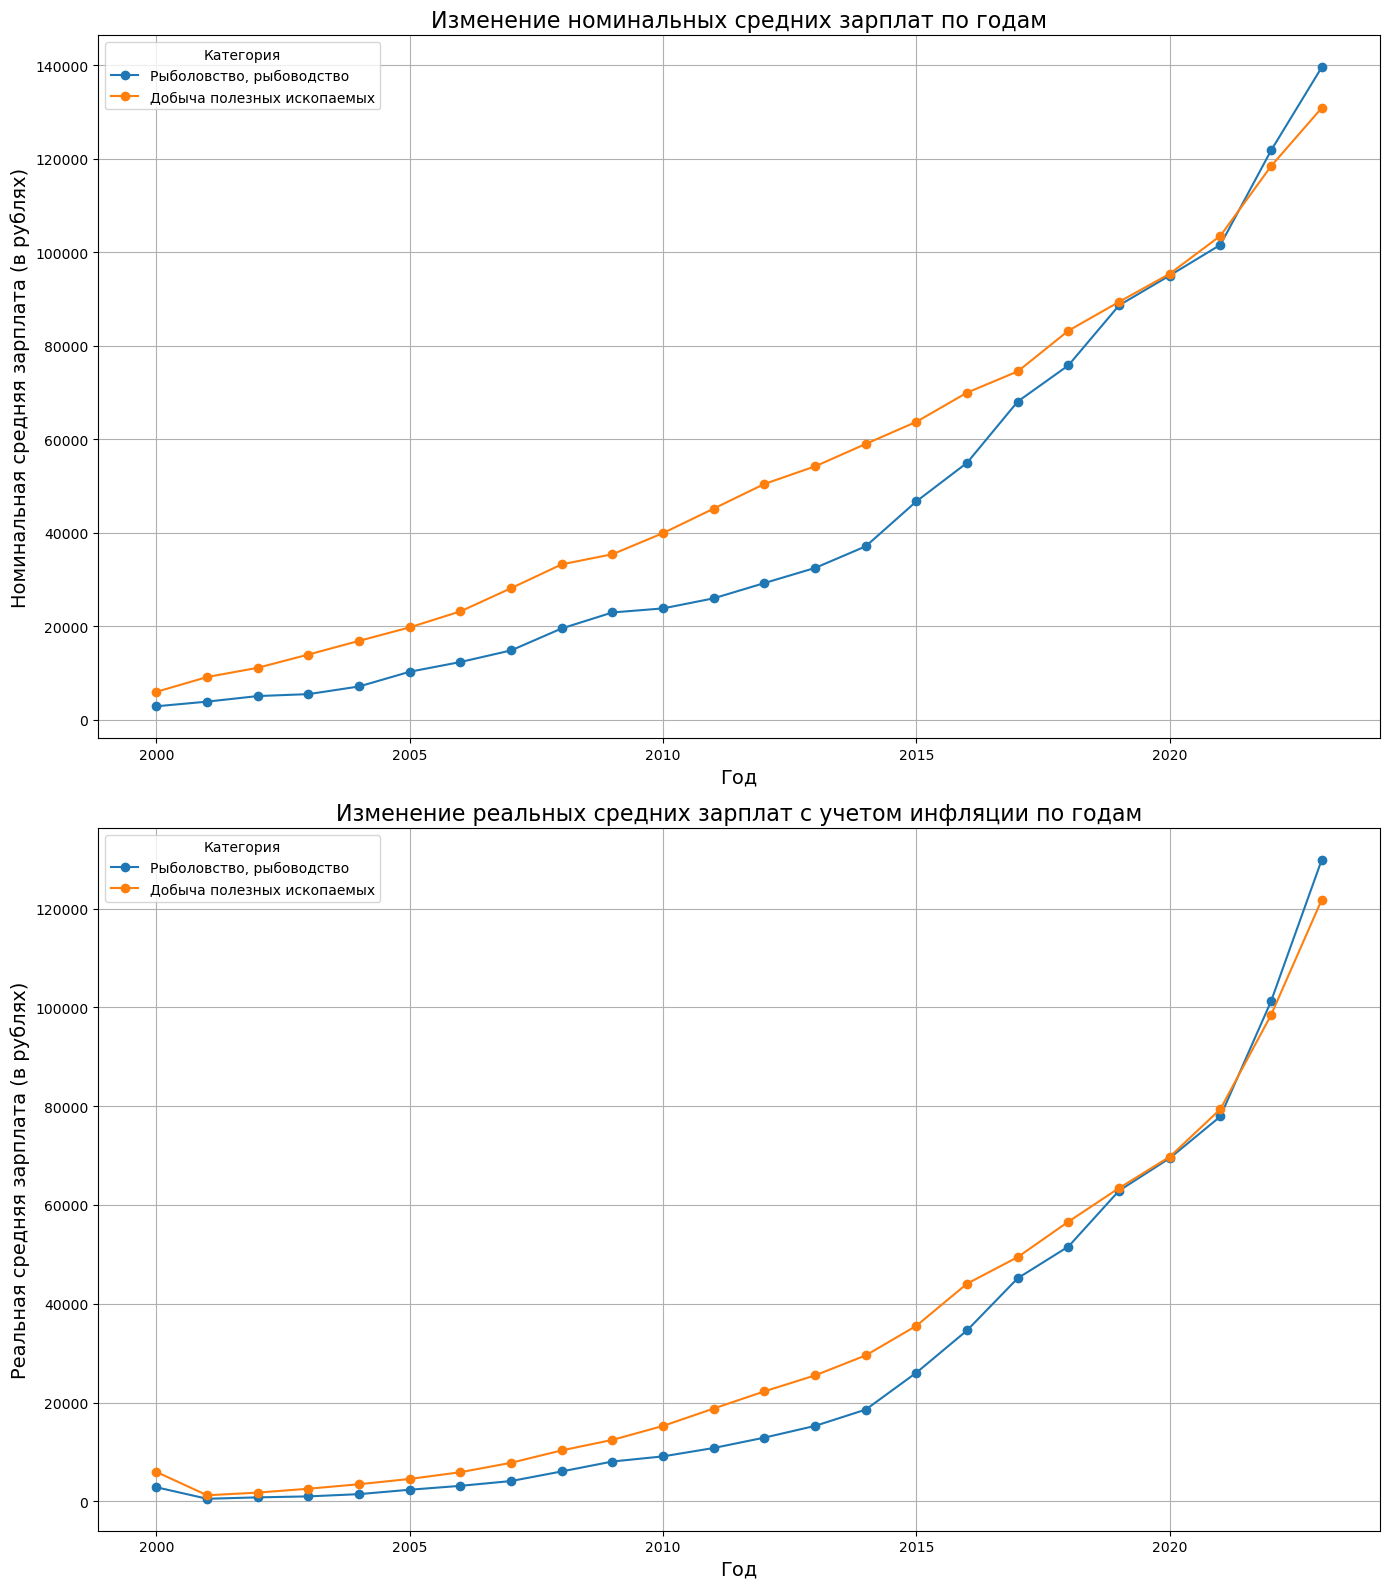

Анализ графиков зарплат без учета инфляции:
1. Наблюдается рост номинальных средних зарплат в обоих секторах протяжении всего представленного периода.
2. Сектор Добыча полезных ископаемых показывает более высокие темпы роста зарплат по сравнению 
с сектором Рыболовство, рыбоводство, что может свидетельствовать о более высокой прибыльности и инвест.привлекательности данной отрасли.
3. В обоих секторах есть точки резкого увеличения номинальных зарплат, что может коррелировать с экономическими событиями,
такими как повышение мировых цен на ресурсы или национальные экономические реформы.

Анализ графиков зарплат с учетом инфляции:
1. Когда учитывается инфляция, рост зарплат выглядит менее выраженным, что указывает на то, что часть роста номинальной заработной платы поглощается ростом цен на товары и услуги.
2. Сектор Добыча полезных ископаемых также показывает более сильный рост реальных зарплат по сравнению с сектором Рыболовство, рыбоводство, но разрыв между двумя секторами сокращается, 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
data_zp = pd.read_excel('zarplata.xlsx')
data_inf_year = pd.read_excel('inf_y.xlsx')

# Фильтрация данных, исключаем категорию "Всего"
data_zp = data_zp[data_zp['Категория'] != 'Всего по экономике']

# Подготовка данных о годовой инфляции
annual_inflation = data_inf_year.set_index('Год')['Всего']
inflation_multipliers = (1 + annual_inflation / 100).cumprod()
base_year = 2000
inflation_multipliers.loc[base_year] = 1
inflation_multipliers = inflation_multipliers.sort_index()

# Расчет реальных зарплат
real_salaries = data_zp.copy()
years = data_zp.columns[1:]  # Годы, начиная с первой колонки после названия категории
for year in years:
    real_salaries[year] = data_zp[year] / inflation_multipliers.loc[int(year)]

# Визуализация номинальных и реальных зарплат
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 16))

# Номинальные зарплаты
for index, row in data_zp.iterrows():
    ax1.plot(years, row[1:], label=row['Категория'], marker='o')
ax1.set_title('Изменение номинальных средних зарплат по годам', fontsize=16)
ax1.set_xlabel('Год', fontsize=14)
ax1.set_ylabel('Номинальная средняя зарплата (в рублях)', fontsize=14)
ax1.legend(title='Категория')
ax1.grid(True)

# Реальные зарплаты
for index, row in real_salaries.iterrows():
    ax2.plot(years, row[1:], label=row['Категория'], marker='o')
ax2.set_title('Изменение реальных средних зарплат с учетом инфляции по годам', fontsize=16)
ax2.set_xlabel('Год', fontsize=14)
ax2.set_ylabel('Реальная средняя зарплата (в рублях)', fontsize=14)
ax2.legend(title='Категория')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Анализ графиков
print("Анализ графиков зарплат без учета инфляции:")
print("1. Наблюдается рост номинальных средних зарплат в обоих секторах протяжении всего представленного периода.")
print("2. Сектор Добыча полезных ископаемых показывает более высокие темпы роста зарплат по сравнению \nс сектором Рыболовство, рыбоводство, что может свидетельствовать о более высокой прибыльности и инвест.привлекательности данной отрасли.")
print("3. В обоих секторах есть точки резкого увеличения номинальных зарплат, что может коррелировать с экономическими событиями,\nтакими как повышение мировых цен на ресурсы или национальные экономические реформы.")
print()
print("Анализ графиков зарплат с учетом инфляции:")
print("1. Когда учитывается инфляция, рост зарплат выглядит менее выраженным, что указывает на то, что часть роста номинальной заработной платы поглощается ростом цен на товары и услуги.")
print("2. Сектор Добыча полезных ископаемых также показывает более сильный рост реальных зарплат по сравнению с сектором Рыболовство, рыбоводство, но разрыв между двумя секторами сокращается, когда учитывается инфляция.")
print("3. Рост реальных зарплат в обоих секторах может свидетельствовать о повышении жизненного уровня работников в этих отраслях, но это увеличение не так заметно, как в случае с номинальными зарплатами.")
print()
print("Общие выводы:")
print("1. Инфляция оказывает заметное влияние на покупательскую способность зарплат. Рост номинальных зарплат не всегда соответствует улучшению реальных доходов населения.")
print("2. Сектор Добыча полезных ископаемых, как правило, обеспечивает более высокие зарплаты и их рост, что может быть связано с высо-кой маржинальностью отрасли.")
print("3. При анализе экономического положения работников и эффективности отраслевой политики необходимо учитывать как номинальные, \nтак и реальные показатели зарплат.")